In [1]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
# Importing the Data
data = pd.read_csv("Mall_Customers.csv")
# Only keeping 2 features for visualization: Annual Income and Spending Score
X = data.iloc[:,[3,4]].values
print(data.iloc[:,[3,4]])

     Annual Income (k$)  Spending Score (1-100)
0                    15                      39
1                    15                      81
2                    16                       6
3                    16                      77
4                    17                      40
..                  ...                     ...
195                 120                      79
196                 126                      28
197                 126                      74
198                 137                      18
199                 137                      83

[200 rows x 2 columns]


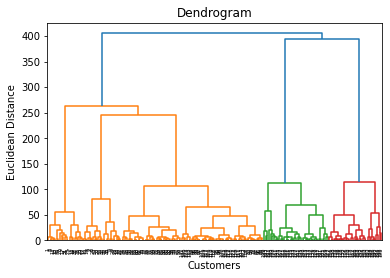

In [7]:
# Using Dendogram to find optimal number of clusters
# From the figure we can select which would be the best #customers, judging from max height (vertical) typically
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X, method='ward'))
plt.title("Dendrogram")
plt.xlabel("Customers")
plt.ylabel("Euclidean Distance")
plt.show()
# Here we can see that either 3 or 5 clusters looks good (We'll take 5 here)

In [8]:
# Training Hierarchical Clustering Model
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
y_hc = hc.fit_predict(X)
print(y_hc)

[4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4
 3 4 3 4 3 4 1 4 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 1 2 0 2 0 2 1 2 0 2 0 2 0 2 0 2 1 2 0 2 1 2
 0 2 0 2 0 2 0 2 0 2 0 2 1 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2]


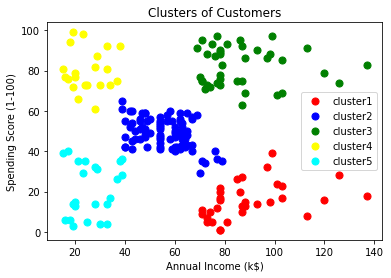

In [10]:
plt.scatter(X[y_hc==0, 0],X[y_hc==0, 1], s=50, c='red', label='cluster1')
plt.scatter(X[y_hc==1, 0],X[y_hc==1, 1], s=50, c='blue', label='cluster2')
plt.scatter(X[y_hc==2, 0],X[y_hc==2, 1], s=50, c='green', label='cluster3')
plt.scatter(X[y_hc==3, 0],X[y_hc==3, 1], s=50, c='yellow', label='cluster4')
plt.scatter(X[y_hc==4, 0],X[y_hc==4, 1], s=50, c='cyan', label='cluster5')
plt.title("Clusters of Customers")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.legend()